In [17]:
import stock_analysis
import pandas as pd

reader = stock_analysis.StockReader('2019-01-01', '2020-12-31')

# get faang data
#fb, aapl, amzn, nflx, goog = (
 #   reader.get_ticker_data(ticker)
 #   for ticker in ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
#)

# get S&P 500 data
#sp = reader.get_index_data('S&P 500')

# get bitcoin data in USD
# bitcoin = reader.get_bitcoin_data('USD')


amzn = pd.read_csv('data/amazon.csv', index_col='date', parse_dates=True)
aapl = pd.read_csv('data/apple.csv', index_col='date', parse_dates=True)
fb = pd.read_csv('data/facebook.csv',  index_col='date', parse_dates=True)
nflx = pd.read_csv('data/netflix.csv',  index_col='date', parse_dates=True)
goog = pd.read_csv('data/google.csv' ,index_col='date', parse_dates=True)
bitcoin = pd.read_csv('data/bitcoin.csv', index_col='date', parse_dates=True)
sp = pd.read_csv('data/sp500.csv',  index_col='date', parse_dates=True)
tsla = pd.read_csv('data/tesla.csv',  index_col='date', parse_dates=True)


In [18]:
from stock_analysis.utils import group_stocks, describe_group

faang = group_stocks(
    {
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

faang_sp = group_stocks(
    {
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog,
        'S&P 500': sp
    }
)

all_assets = group_stocks(
    {
        'Bitcoin': bitcoin,
        'S&P 500': sp,
        'Facebook': fb, 
        'Apple': aapl, 
        'Amazon': amzn, 
        'Netflix': nflx, 
        'Google': goog
    }
)

In [19]:
describe_group(all_assets).loc['close',]

name,Amazon,Apple,Bitcoin,Facebook,Google,Netflix,S&P 500
count,505.000000,505.000000,727.000000,504.000000,505.000000,505.000000,505.000000
mean,2235.904988,73.748386,9252.825408,207.994504,1335.188544,387.966593,3065.907599
std,594.306346,27.280933,4034.014685,39.556888,200.793911,78.931238,292.376435
min,1500.280029,35.547501,3399.471680,131.740005,1016.059998,254.589996,2237.399902
25%,1785.660034,50.782501,7218.593750,179.985001,1169.949951,329.089996,2870.719971
50%,1904.280029,66.730003,9137.993164,196.760002,1295.280029,364.369995,3005.469971
75%,2890.300049,91.632500,10570.513184,235.744995,1476.229980,469.959991,3276.020020
max,3531.449951,136.690002,29001.720703,303.910004,1827.989990,556.549988,3756.070068


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

netflix_viz = stock_analysis.StockVisualizer(nflx)

[Text(0.5, 1.0, 'Netflix Closing Price'), Text(0, 0.5, 'price ($)')]

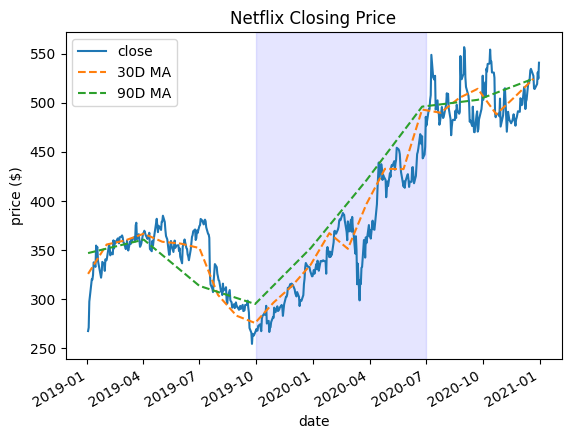

In [21]:
ax = netflix_viz.moving_average('close', ['30D', '90D'])
netflix_viz.shade_region(
    ax, x=('2019-10-01', '2020-07-01'), color='blue', alpha=0.1
)
ax.set(title='Netflix Closing Price', ylabel='price ($)')

In [23]:
from visual_aids import finance_viz
_ = finance_viz.support_and_resistance()

AttributeError: 'NoneType' object has no attribute 'group'

[Text(0.5, 1.0, 'Netflix Closing Price'), Text(0, 0.5, 'price ($)')]

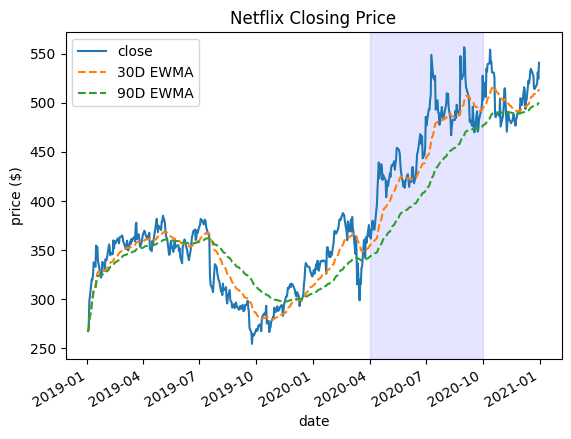

In [25]:
ax = netflix_viz.exp_smoothing('close', [30, 90])
netflix_viz.shade_region(
    ax, x=('2020-04-01', '2020-10-01'), color='blue', alpha=0.1
)
ax.set(title='Netflix Closing Price', ylabel='price ($)')

In [26]:
%matplotlib widget

In [27]:
%matplotlib widget
from ipywidgets import interact

def moving_averages(viz):
    def plot_viz(period=20, exponentially_smoothed=False):
        if exponentially_smoothed:
            ax = netflix_viz.exp_smoothing('close', period)
        else:
            ax = netflix_viz.moving_average('close', str(period) + 'D')
        
        ax.set(title='Netflix Closing Price', ylabel='price ($)')
    
    return plot_viz
interact(moving_averages(netflix_viz), period=(5, 200, 5), exponentially_smoothed=False);

interactive(children=(IntSlider(value=20, description='period', max=200, min=5, step=5), Checkbox(value=False,…

In [28]:
%matplotlib inline

array([<AxesSubplot:title={'center':"After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <AxesSubplot:title={'center':'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

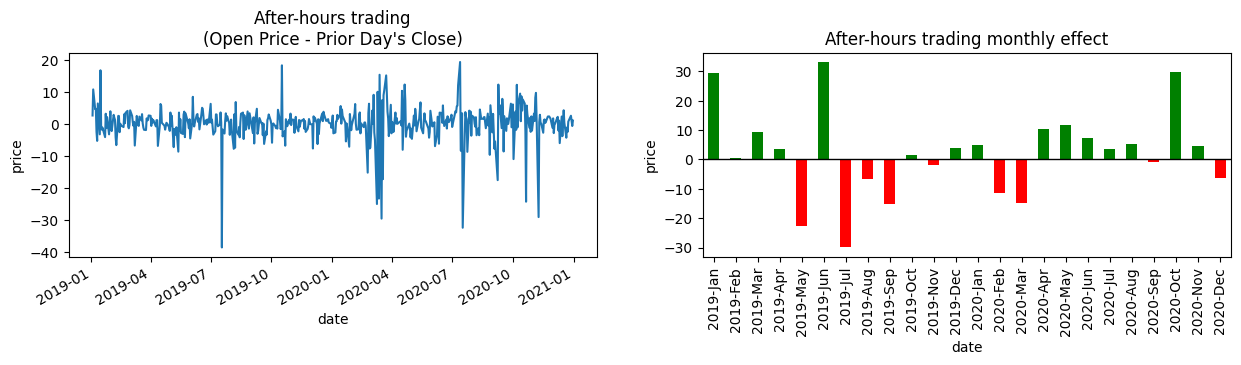

In [29]:
netflix_viz.after_hours_trades()

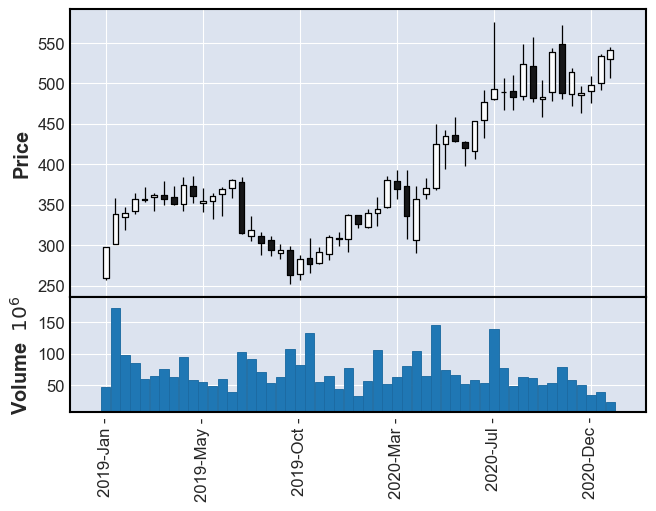

In [30]:
netflix_viz.candlestick(resample='2W', volume=True, xrotation=90, datetime_format='%Y-%b -')

In [31]:
import matplotlib as mpl
mpl.rcdefaults()
%matplotlib inline

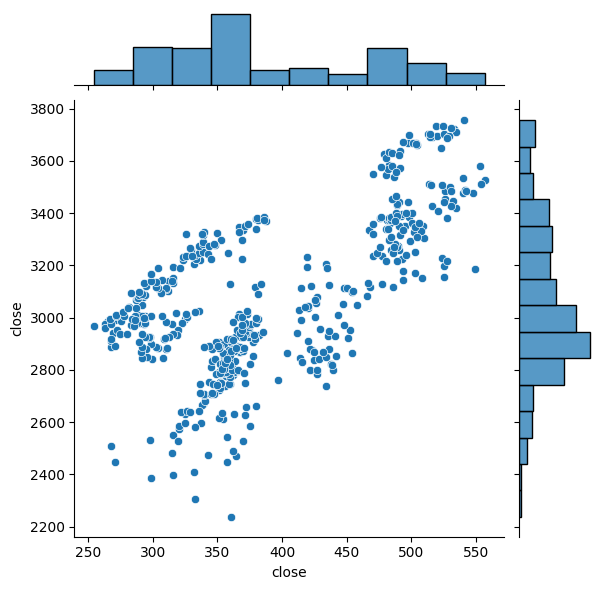

In [32]:
netflix_viz.jointplot(sp, 'close')

<AxesSubplot:>

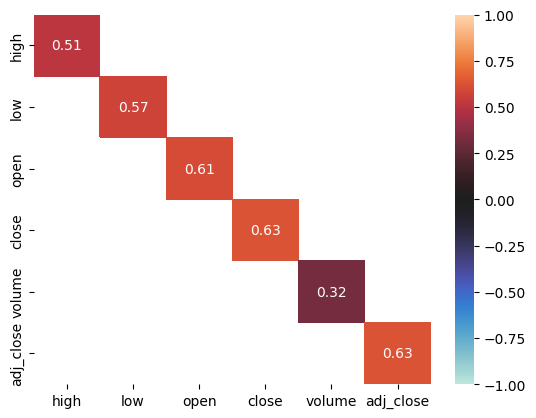

In [33]:
netflix_viz.correlation_heatmap(amzn)

<AxesSubplot:ylabel='price'>

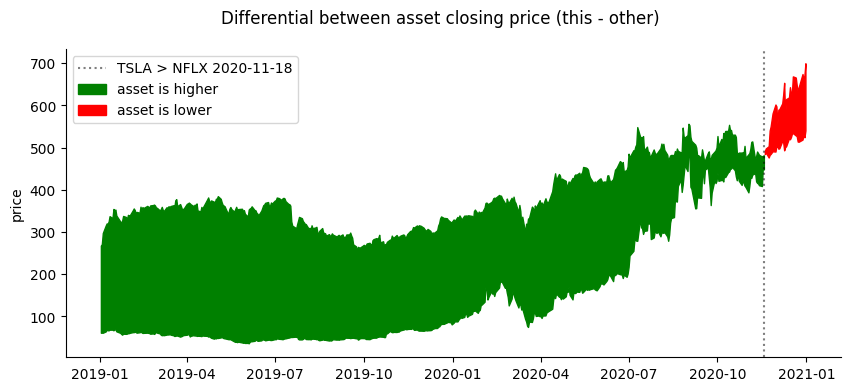

In [34]:
#tsla = reader.get_ticker_data('TSLA')
change_date = (tsla.close > nflx.close).idxmax()
ax = netflix_viz.fill_between_other(tsla)
netflix_viz.add_reference_line(
    ax, 
    x=change_date, 
    color='k', 
    linestyle=':', 
    label=f'TSLA > NFLX {change_date:%Y-%m-%d}',
    alpha=0.5
)

<AxesSubplot:xlabel='name', ylabel='name'>

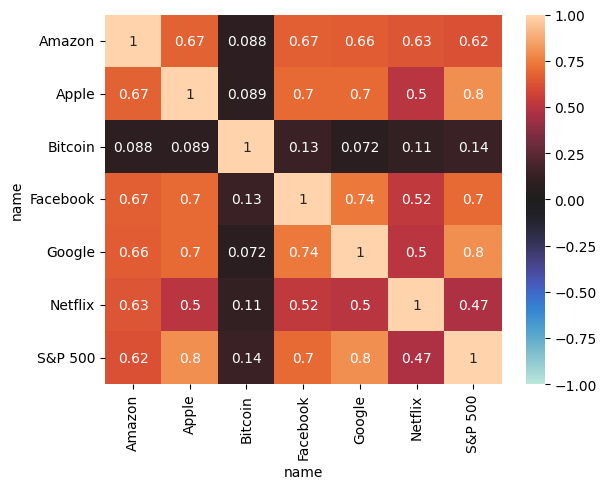

In [35]:
all_assets_viz = stock_analysis.AssetGroupVisualizer(all_assets)
all_assets_viz.heatmap()

ValueError: cannot reindex from a duplicate axis

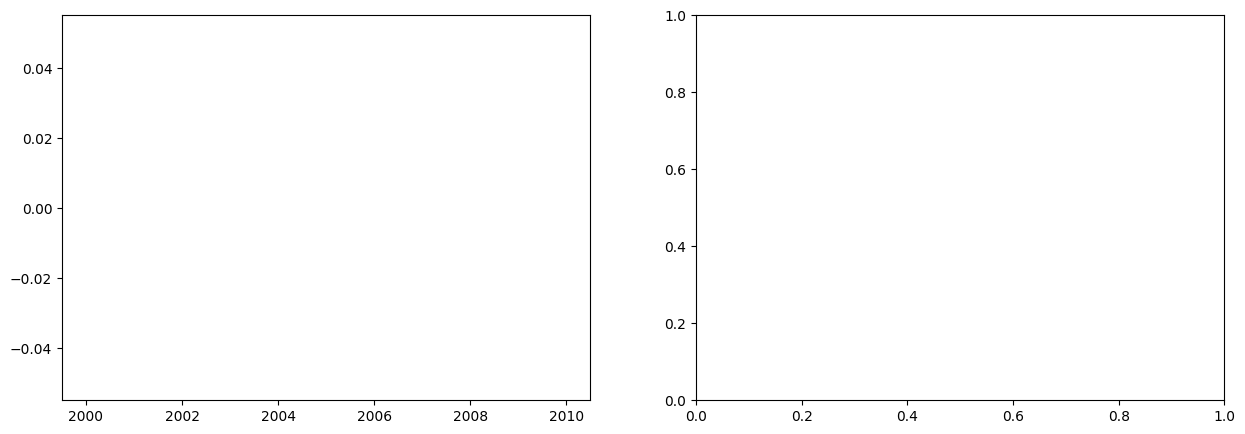

In [36]:
faang_sp_viz = stock_analysis.AssetGroupVisualizer(faang_sp)
bitcoin_viz = stock_analysis.StockVisualizer(bitcoin)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
faang_sp_viz.evolution_over_time('close', ax=axes[0], style=faang_sp_viz.group_by)
bitcoin_viz.evolution_over_time('close', ax=axes[1], label='Bitcoin')

array([[<AxesSubplot:title={'center':"Amazon Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Amazon after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Apple Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Apple after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Facebook Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Facebook after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Google Open Price - Prior Day's Close"}, xlabel='date', ylabel='price'>,
        <AxesSubplot:title={'center':'Google after-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
       [<AxesSubplot:title={'center':"Netflix Open Price - Prior Day's Close"}, xlabel='da

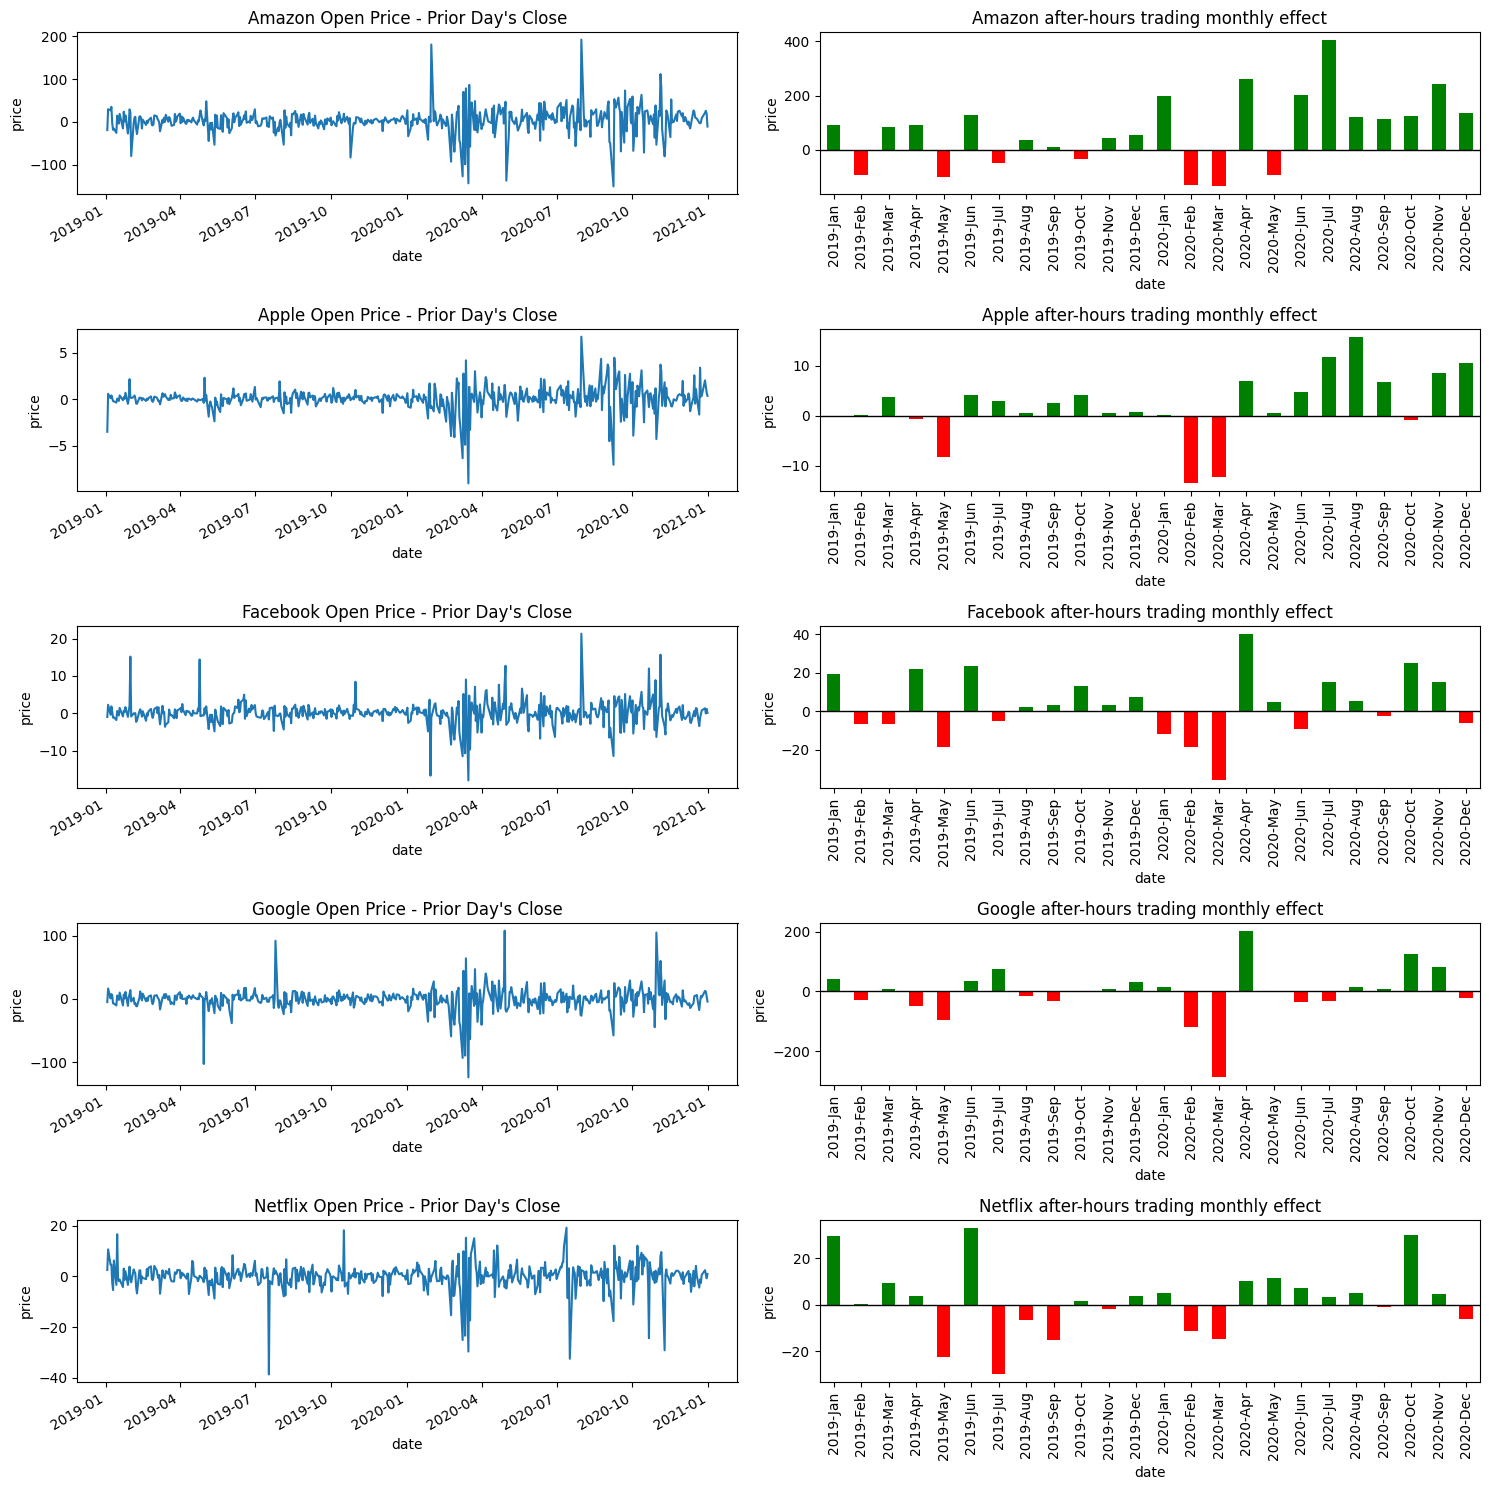

In [37]:
faang_viz = stock_analysis.AssetGroupVisualizer(faang)
faang_viz.after_hours_trades()

<AxesSubplot:xlabel='date'>

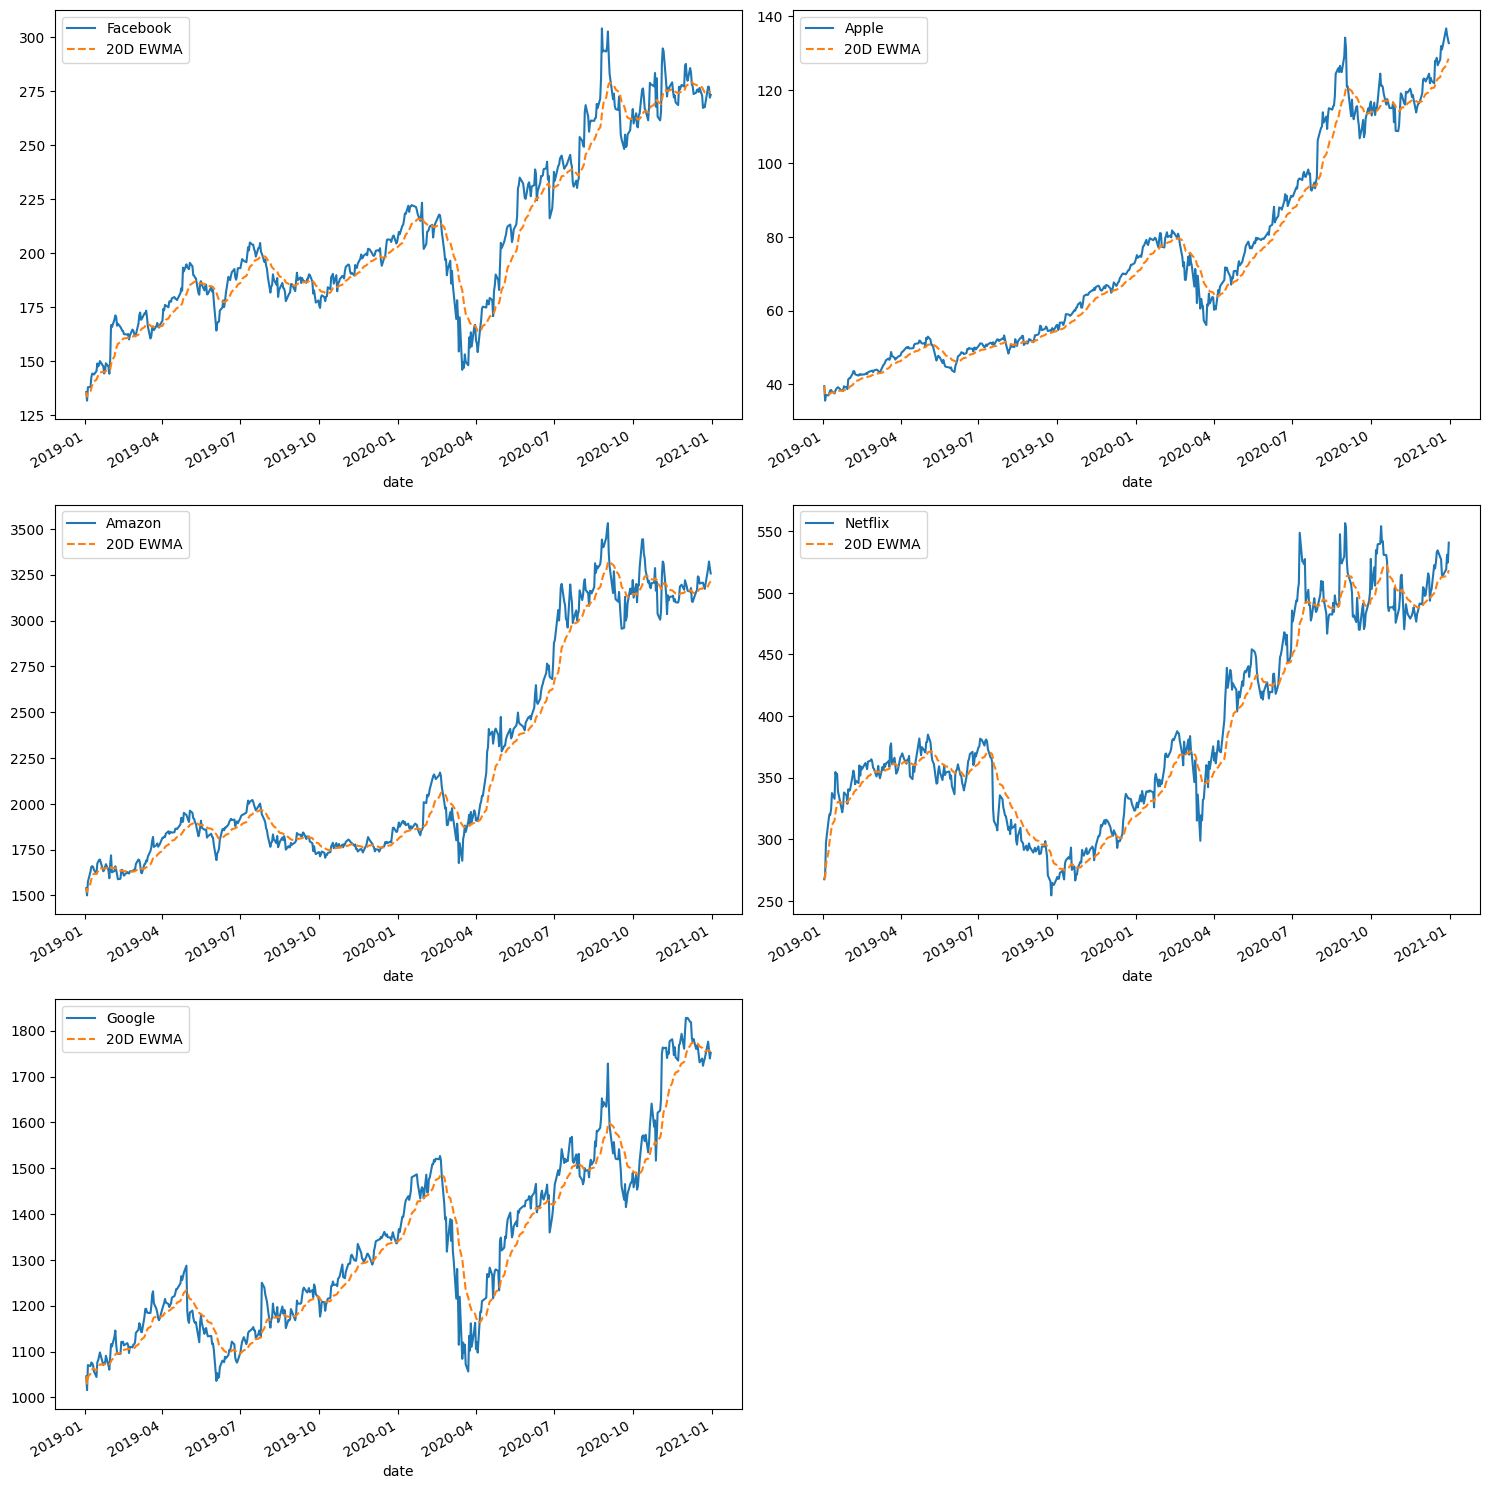

In [39]:
faang_viz.exp_smoothing('close', 20)

<AxesSubplot:xlabel='date'>

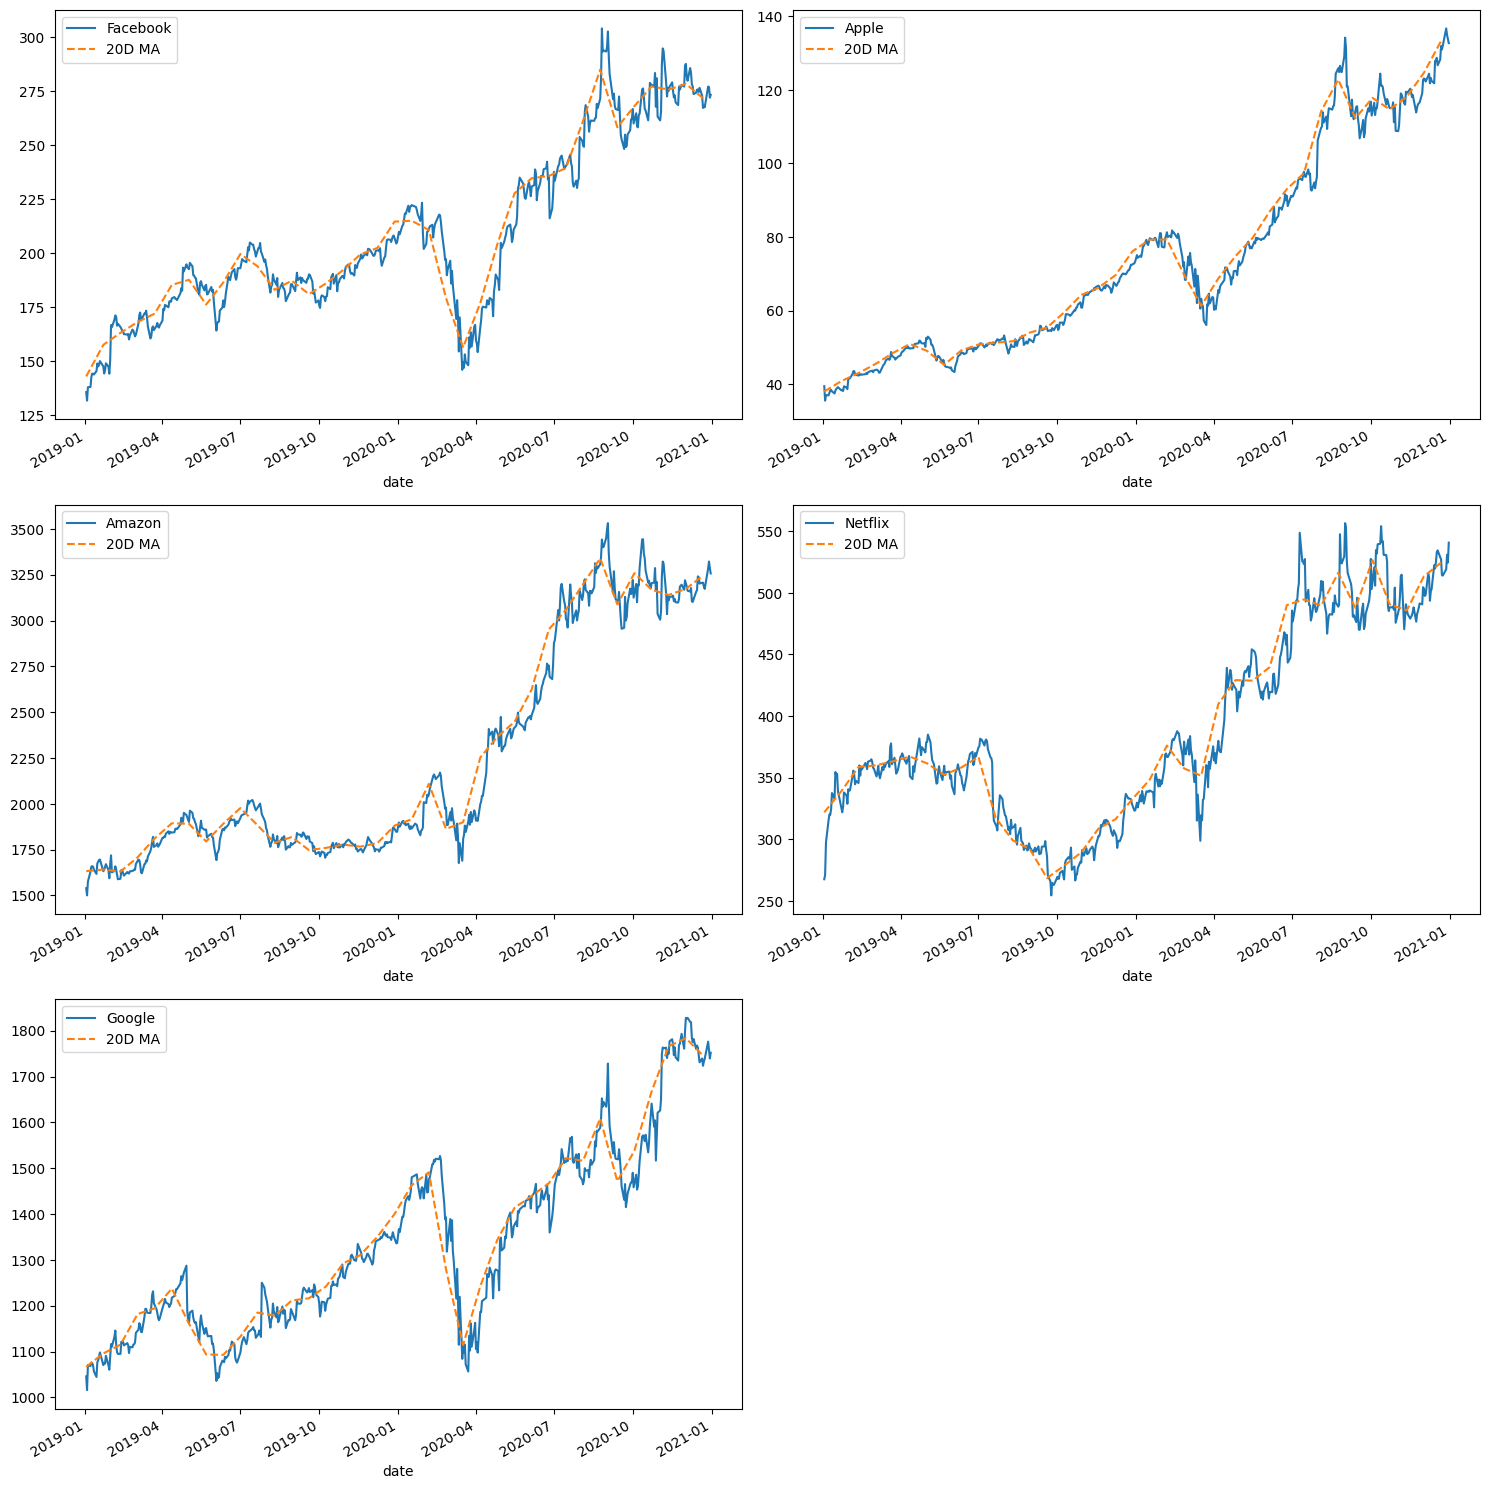

In [40]:
faang_viz.moving_average('close', '20D')

array([<AxesSubplot:title={'center':'Amazon - close'}, xlabel='close', ylabel='Count'>,
       <AxesSubplot:title={'center':'Apple - close'}, xlabel='close', ylabel='Count'>,
       <AxesSubplot:title={'center':'Facebook - close'}, xlabel='close', ylabel='Count'>,
       <AxesSubplot:title={'center':'Google - close'}, xlabel='close', ylabel='Count'>,
       <AxesSubplot:title={'center':'Netflix - close'}, xlabel='close', ylabel='Count'>,
       <AxesSubplot:>], dtype=object)

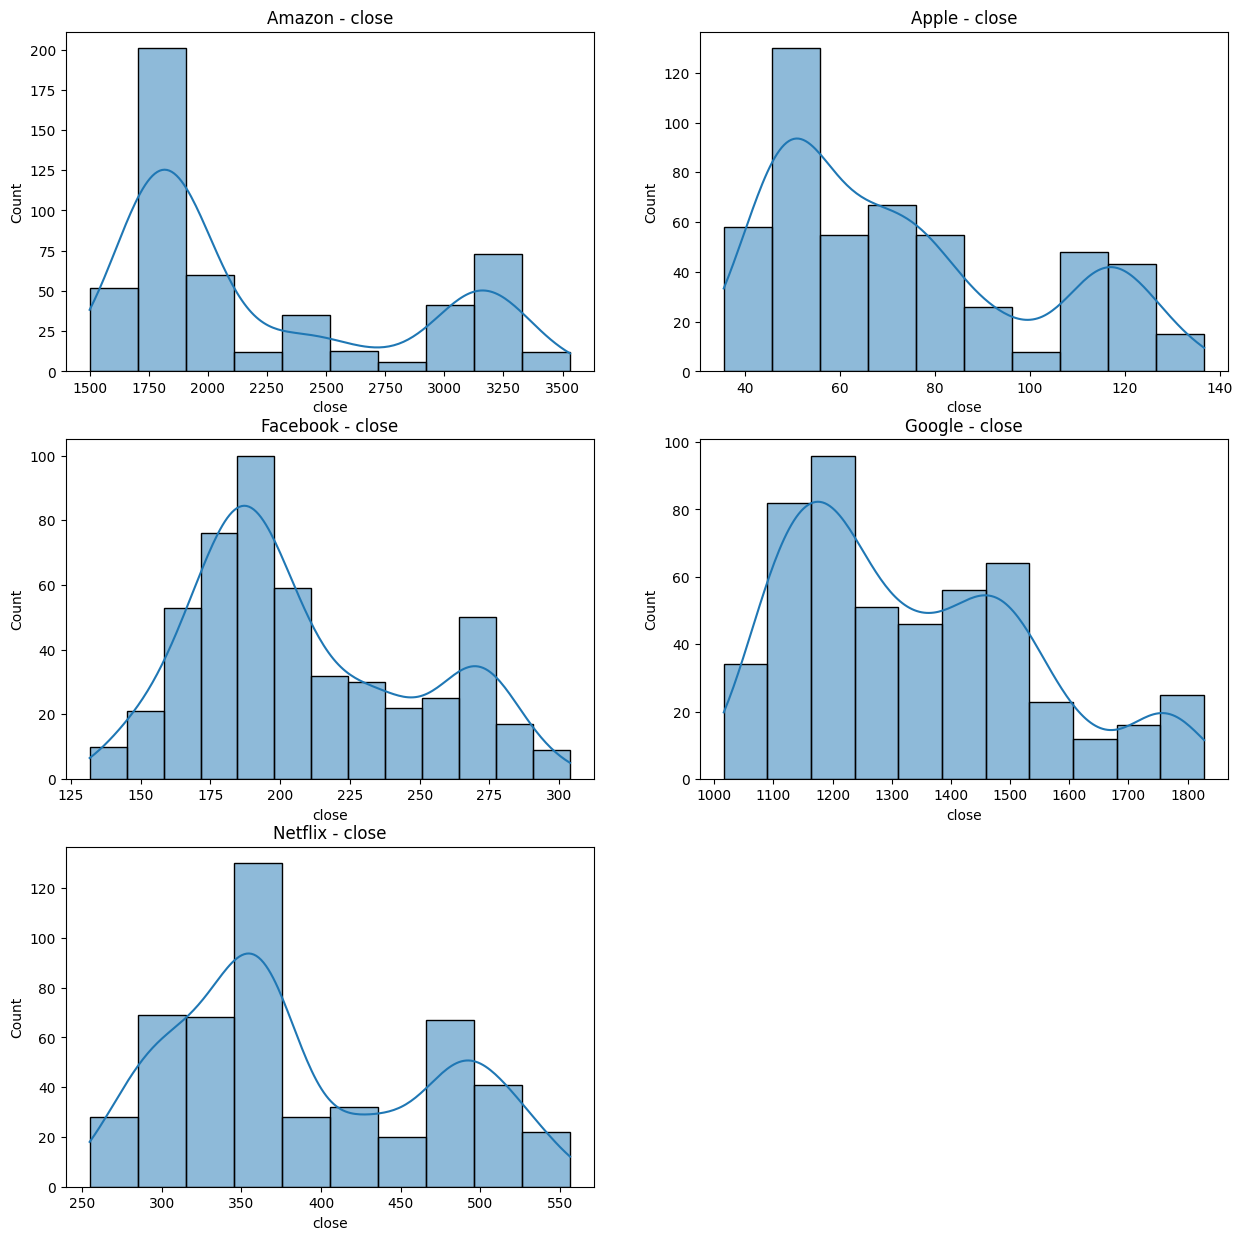

In [41]:
faang_viz.histogram('close')

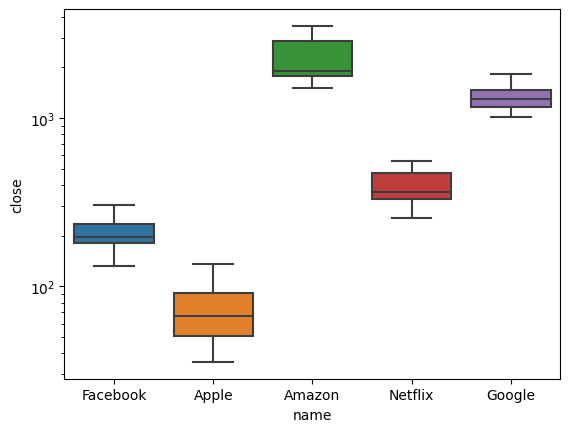

In [42]:
faang_viz.boxplot('close')
plt.yscale('log')

<AxesSubplot:xlabel='name', ylabel='name'>

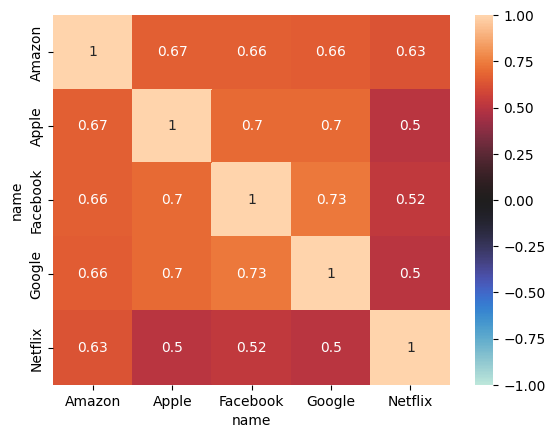

In [43]:
faang_viz.heatmap()

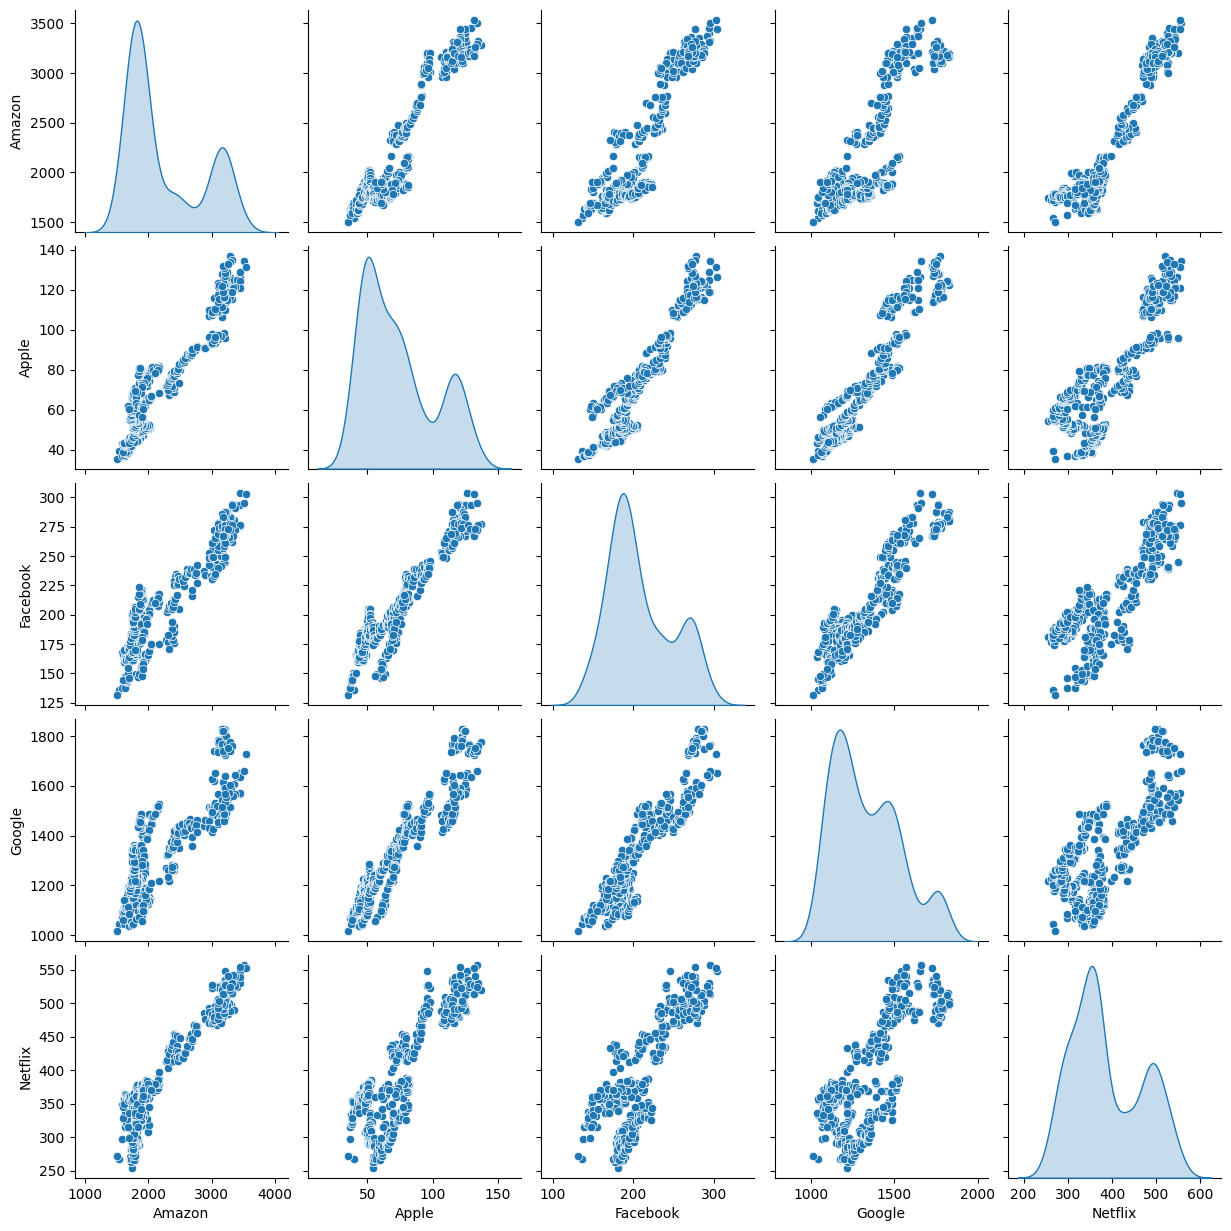

In [44]:
faang_viz.pairplot()

In [45]:
nflx_analyzer = stock_analysis.StockAnalyzer(nflx)

In [46]:
nflx_analyzer.annualized_volatility()

0.4626772090887299

In [47]:
all_assets_analyzer = stock_analysis.AssetGroupAnalyzer(all_assets)

In [48]:
all_assets_analyzer.analyze('cv')

{'Amazon': 0.2658012522278963,
 'Apple': 0.36991905161737615,
 'Bitcoin': 0.43597652683008137,
 'Facebook': 0.19018237027579932,
 'Google': 0.15038618497328074,
 'Netflix': 0.20344854330432688,
 'S&P 500': 0.09536374658108937}

In [49]:
all_assets_analyzer.analyze('annualized_volatility')

{'Amazon': 0.3851099077041784,
 'Apple': 0.4670809643500883,
 'Bitcoin': 0.4635140114227397,
 'Facebook': 0.4584826019126009,
 'Google': 0.3833720603377728,
 'Netflix': 0.4626772090887299,
 'S&P 500': 0.34491195196047003}

In [50]:
all_assets_analyzer.analyze('is_bull_market')

{'Amazon': False,
 'Apple': True,
 'Bitcoin': True,
 'Facebook': False,
 'Google': False,
 'Netflix': False,
 'S&P 500': False}

In [51]:
all_assets_analyzer.analyze('is_bear_market')

{'Amazon': False,
 'Apple': False,
 'Bitcoin': False,
 'Facebook': False,
 'Google': False,
 'Netflix': False,
 'S&P 500': False}

In [52]:
all_assets_analyzer.analyze('beta', index=sp)

{'Amazon': 0.756369118238921,
 'Apple': 1.1732735011059163,
 'Bitcoin': 0.37160242824833606,
 'Facebook': 1.0228095246564706,
 'Google': 0.9862076250402396,
 'Netflix': 0.7408228073823274,
 'S&P 500': 1.0}

In [53]:
r_f = reader.get_risk_free_rate_of_return()
all_assets_analyzer.analyze('alpha', index=sp, r_f=r_f)

{'Amazon': 0.7383391908270169,
 'Apple': 1.7801122522388666,
 'Bitcoin': 6.355297988074054,
 'Facebook': 0.5057312148170943,
 'Google': 0.18537197824248108,
 'Netflix': 0.6500392764754641,
 'S&P 500': 0.0}

Text(0.5, 0.98, 'Cumulative Returns')

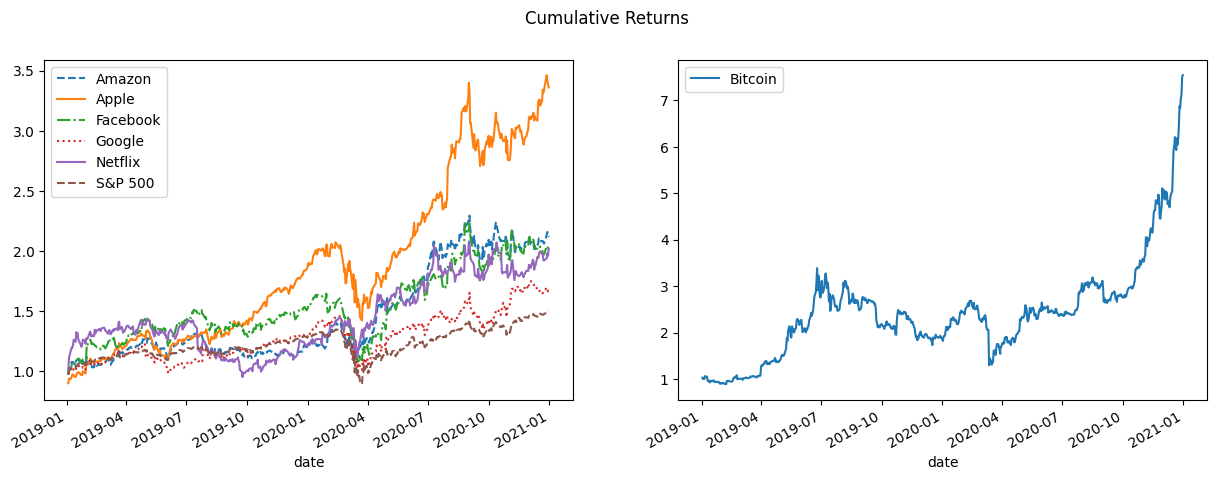

In [54]:
from cycler import cycler

# to make this a little easier to see in the black and white text
bw_viz_cycler = (
    cycler(color=[plt.get_cmap('tab10')(x/10) for x in range(10)])
    + cycler(linestyle=['dashed', 'solid', 'dashdot', 'dotted', 'solid'] * 2)
)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_prop_cycle(bw_viz_cycler)
cumulative_returns = all_assets_analyzer.analyze('cumulative_returns')

for name, data in cumulative_returns.items():
    data.plot(
        ax=axes[1] if name == 'Bitcoin' else axes[0], 
        label=name,
        legend=True
    )
fig.suptitle('Cumulative Returns')

In [55]:
from stock_analysis import StockModeler

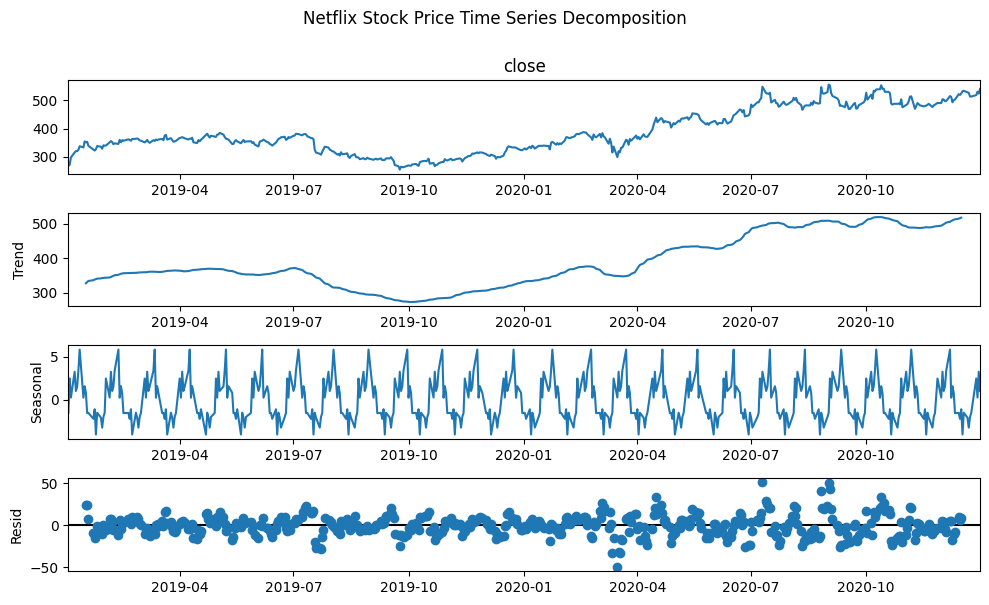

In [56]:
decomposition = StockModeler.decompose(nflx, 20) # 20 period frequency
fig = decomposition.plot()
fig.suptitle('Netflix Stock Price Time Series Decomposition', y=1)
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

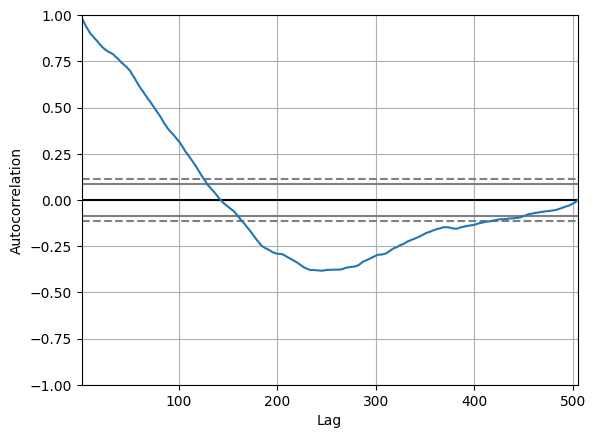

In [57]:
# we can use autocorrelation plots to find a good starting point for ARIMA
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(nflx.close)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

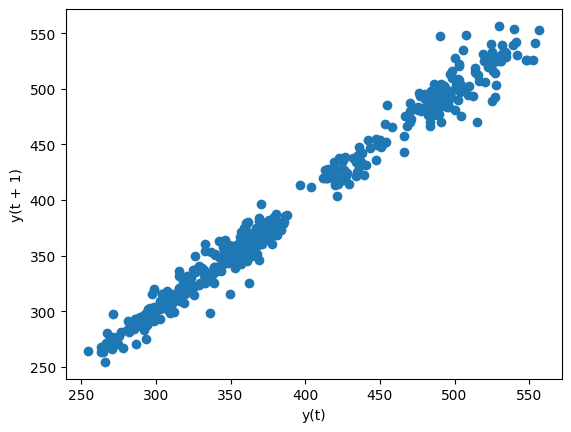

In [58]:
from pandas.plotting import lag_plot
lag_plot(nflx.close)

In [59]:
%%capture
# this takes a long time to run, so we will start with a smaller AR of 10
arima_model = StockModeler.arima(nflx, ar=10, i=1, ma=5)

In [60]:
# AR = 10, I = 1, MA = 5
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  522
Model:                ARIMA(10, 1, 5)   Log Likelihood               -1925.946
Date:                Mon, 23 Sep 2024   AIC                           3883.892
Time:                        23:00:55   BIC                           3951.984
Sample:                    01-02-2019   HQIC                          3910.564
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1414      0.278     -0.508      0.611      -0.687       0.404
ar.L2          0.1100      0.235      0.469      0.639      -0.350       0.570
ar.L3         -0.2974      0.201     -1.479      0.1

array([<AxesSubplot:title={'center':'Residuals'}, xlabel='Date', ylabel='Residual'>,
       <AxesSubplot:title={'center':'Residuals KDE'}, xlabel='Residual', ylabel='Density'>],
      dtype=object)

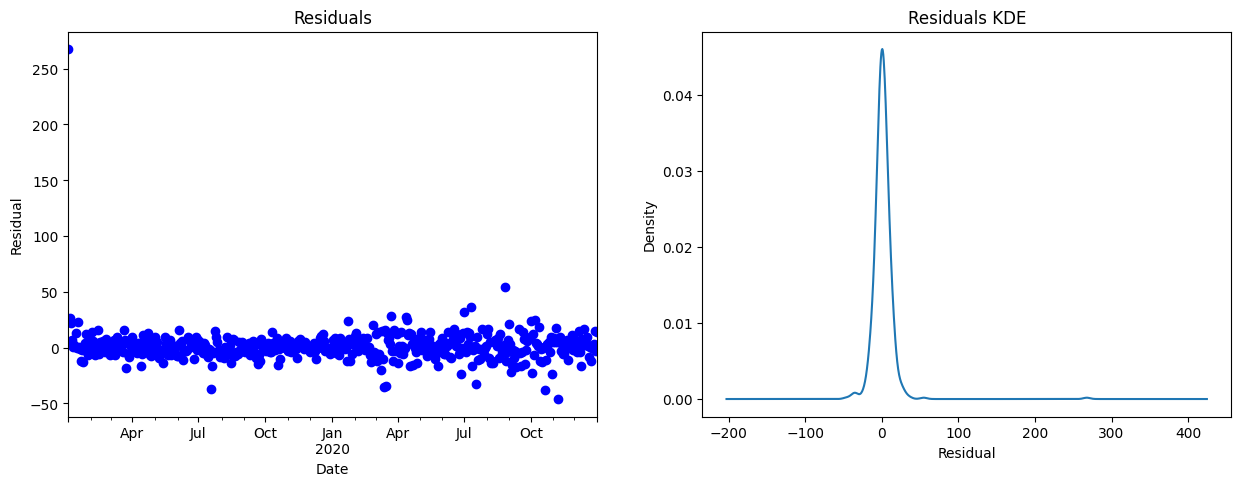

In [61]:
StockModeler.plot_residuals(arima_model)

In [62]:
X, Y, lm = StockModeler.regression(nflx)
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  close   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.470e+05
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                        0.00
Time:                        23:01:34   Log-Likelihood:                         -1889.3
No. Observations:                 504   AIC:                                      3781.
Df Residuals:                     503   BIC:                                      3785.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

array([<AxesSubplot:title={'center':'Residuals'}, xlabel='Date', ylabel='Residual'>,
       <AxesSubplot:title={'center':'Residuals KDE'}, xlabel='Residual', ylabel='Density'>],
      dtype=object)

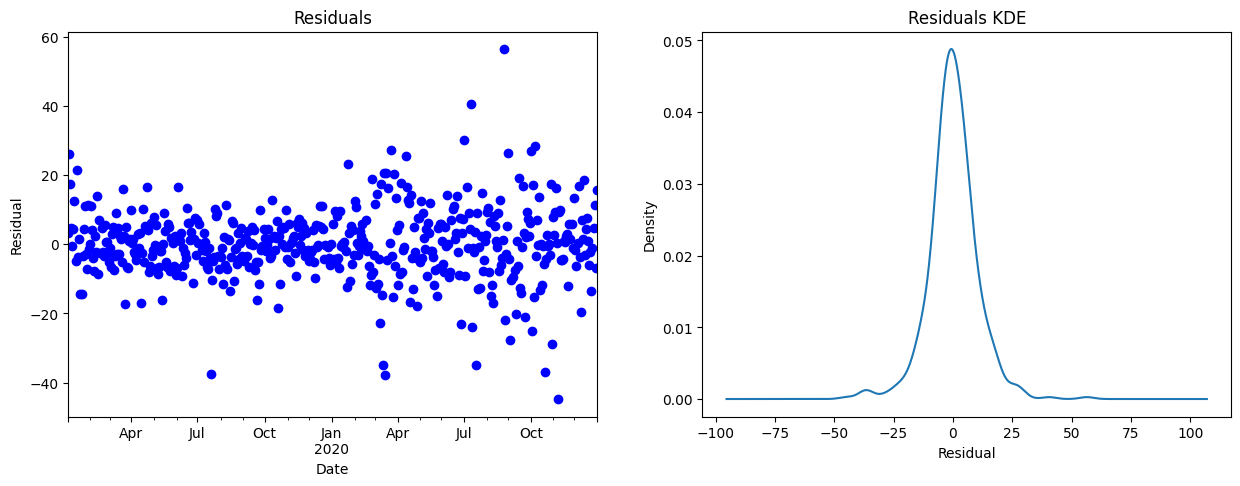

In [63]:
StockModeler.plot_residuals(lm)

Text(0, 0.5, 'price ($)')

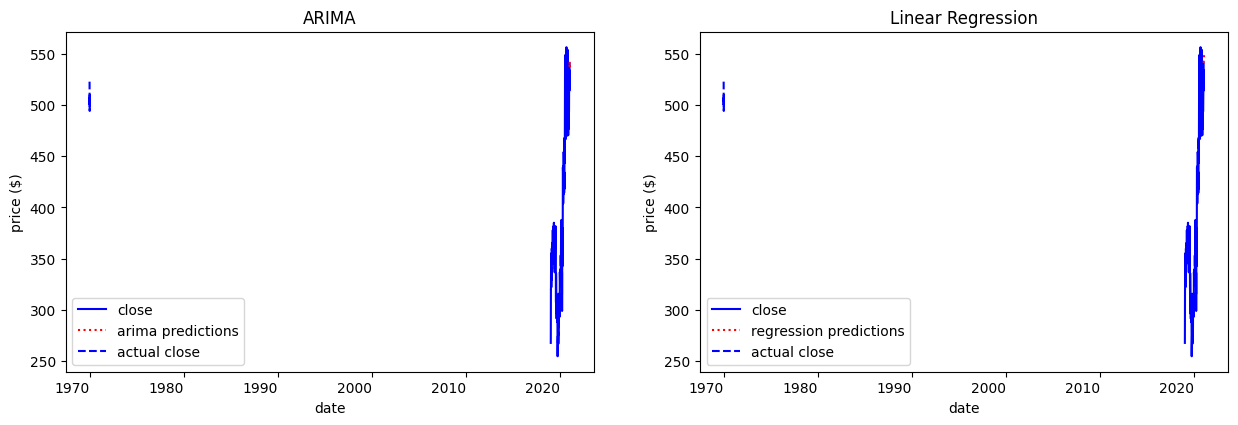

In [64]:
import datetime as dt

start = dt.date(2021, 1, 1)
end = dt.date(2021, 1, 14)

jan = pd.read_csv('data/netflix_jan_2021.csv')
#stock_analysis.StockReader(start, end).get_ticker_data('NFLX')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

arima_ax = StockModeler.arima_predictions(
    nflx, arima_model, start=start, end=end,
    ax=axes[0], title='ARIMA', color='b'
)
jan.close.plot(ax=arima_ax, style='b--', label='actual close')
arima_ax.legend()
arima_ax.set_ylabel('price ($)')

linear_reg = StockModeler.regression_predictions(
    nflx, lm, start=start, end=end,
    ax=axes[1], title='Linear Regression', color='b'
)
jan.close.plot(ax=linear_reg, style='b--', label='actual close')
linear_reg.legend()
linear_reg.set_ylabel('price ($)')

In [65]:
msft = pd.read_csv('data/msft.csv', index_col='date', parse_dates=True) 
#stock_analysis.StockReader('2019-07-01', '2020-06-30').get_ticker_data('MSFT')
real_stock, axes = finance_viz.random_walk_stock_comparison(msft, probs=[0.45, 0.55])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/msft.csv'

In [66]:
real_stock

NameError: name 'real_stock' is not defined